In [2]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
from sklearn.cluster import KMeans
from sklearn.decomposition import IncrementalPCA
from sklearn import metrics

data = pandas.read_csv('similarity-updated.csv', header = None)
data.head()
data





,0,1,2,3,4,5,6,7,8,9,...,396,397,398,399,400,401,402,403,404,405
0,1.000000,0.154615,0.128242,0.117036,0.096753,0.106672,0.216381,0.105924,0.244316,0.242717,...,0.080793,0.195271,0.106780,0.287842,0.079860,0.139011,0.176458,0.036928,0.207757,0.293838
1,0.154615,1.000000,0.096306,0.063149,0.057980,0.082548,0.126921,0.082246,0.185646,0.115409,...,0.064670,0.131949,0.115271,0.177713,0.045531,0.082933,0.115422,0.021049,0.176515,0.116874
2,0.128242,0.096306,1.000000,0.096306,0.074620,0.114210,0.257796,0.084923,0.113493,0.225923,...,0.055419,0.110993,0.083623,0.178426,0.097085,0.126835,0.145613,0.051699,0.133769,0.155928
3,0.117036,0.063149,0.096306,1.000000,0.063622,0.090841,0.116372,0.086262,0.078547,0.085417,...,0.064317,0.117952,0.074103,0.098842,0.103589,0.090239,0.109755,0.036189,0.149799,0.063875
4,0.096753,0.057980,0.074620,0.063622,1.000000,0.118357,0.127003,0.055388,0.085349,0.129044,...,0.054978,0.083128,0.060337,0.105096,0.068538,0.087177,0.117711,0.035451,0.092469,0.146810
5,0.106672,0.082548,0.114210,0.090841,0.118357,1.000000,0.214474,0.064455,0.088579,0.177535,...,0.057294,0.113456,0.107426,0.108933,0.106672,0.135319,0.114587,0.017339,0.143611,0.199397
6,0.216381,0.126921,0.257796,0.116372,0.127003,0.214474,1.000000,0.172189,0.146099,0.192647,...,0.108370,0.274846,0.169690,0.212533,0.195736,0.251374,0.224305,0.066839,0.338760,0.147386
7,0.105924,0.082246,0.084923,0.086262,0.055388,0.064455,0.172189,1.000000,0.112533,0.171268,...,0.036740,0.096720,0.064173,0.167503,0.058299,0.089776,0.085777,0.033973,0.110525,0.140228
8,0.244316,0.185646,0.113493,0.078547,0.085349,0.088579,0.146099,0.112533,1.000000,0.148681,...,0.105110,0.200406,0.175801,0.232971,0.061792,0.097683,0.181253,0.040990,0.204803,0.201441
9,0.242717,0.115409,0.225923,0.085417,0.129044,0.177535,0.192647,0.171268,0.148681,1.000000,...,0.136740,0.235284,0.209186,0.238380,0.159600,0.270229,0.302125,0.095273,0.326251,0.180527


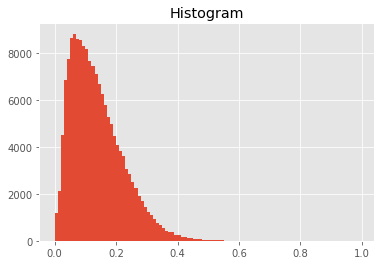

In [3]:
array = data.values
flatarray = array.flatten()
#print(array)
#[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
#np.histogram(data, bins = 'auto')
#plt.hist(arr, bins = 'auto')
plt.hist(flatarray, bins = [float(x)/100 for x in range(0,100)])#[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
plt.title('Histogram')
plt.show()

In [42]:
#PCA
ipca = IncrementalPCA(n_components = 2, batch_size = 3)
ipca.fit(array)
transformedData = ipca.transform(array)
transformedData

array([[  4.84062212e-01,   1.50190130e-01],
       [ -9.56858704e-01,  -3.07098746e-01],
       [ -2.26915212e-02,   4.94868883e-02],
       [ -1.07843917e+00,  -3.99609571e-01],
       [ -8.57339271e-01,  -1.58930575e-01],
       [ -4.41080011e-01,   5.52908303e-01],
       [  1.29582258e+00,  -5.86576708e-01],
       [ -6.98615715e-01,   2.83432720e-01],
       [ -2.35156514e-01,  -2.58035418e-01],
       [  1.27696291e+00,  -6.00086294e-01],
       [ -1.71955679e+00,   9.09064593e-02],
       [ -1.38644661e+00,   1.31181400e-01],
       [  9.45043093e-01,  -2.75428022e-01],
       [  1.01724350e+00,  -6.41406210e-01],
       [  6.01018031e-01,   2.87749000e-01],
       [ -3.47224014e-01,  -1.90958313e-01],
       [ -1.94304858e+00,  -5.27562243e-01],
       [  1.04857135e+00,  -2.72240211e-01],
       [ -1.43484223e+00,   1.15402400e-01],
       [  1.26237475e+00,   1.14862914e+00],
       [  6.03457698e-01,  -3.38263504e-01],
       [ -1.05587226e+00,   4.01493226e-01],
       [  